# Import Python Libraries for Data Analysis and Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Data 

In [3]:
data = pd.read_csv('red.csv')

# Display First Five Rows

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Display Last Five Rows

In [5]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


# Check Data Shape

In [6]:
data.shape #1599 rows with 12 columns

(1599, 12)

# Check Data Types

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Check For Missing Data  

In [8]:
#function to display percentage of missing data
def missing_statistics(df):    
    statitics = pd.DataFrame(df.isnull().sum()).reset_index()
    statitics.columns=['COLUMN NAME',"MISSING VALUES"]
    statitics['TOTAL ROWS'] = df.shape[0]
    statitics['% MISSING'] = round((statitics['MISSING VALUES']/statitics['TOTAL ROWS'])*100,2)
    return statitics

In [9]:
missing_statistics(data)

,COLUMN NAME,MISSING VALUES,TOTAL ROWS,% MISSING
0,fixed acidity,0,1599,0.0
1,volatile acidity,0,1599,0.0
2,citric acid,0,1599,0.0
3,residual sugar,0,1599,0.0
4,chlorides,0,1599,0.0
5,free sulfur dioxide,0,1599,0.0
6,total sulfur dioxide,0,1599,0.0
7,density,0,1599,0.0
8,pH,0,1599,0.0
9,sulphates,0,1599,0.0


# Plot HeatMap

Text(0.5, 1.0, 'HeatMap Showing The Correlation Between Features')

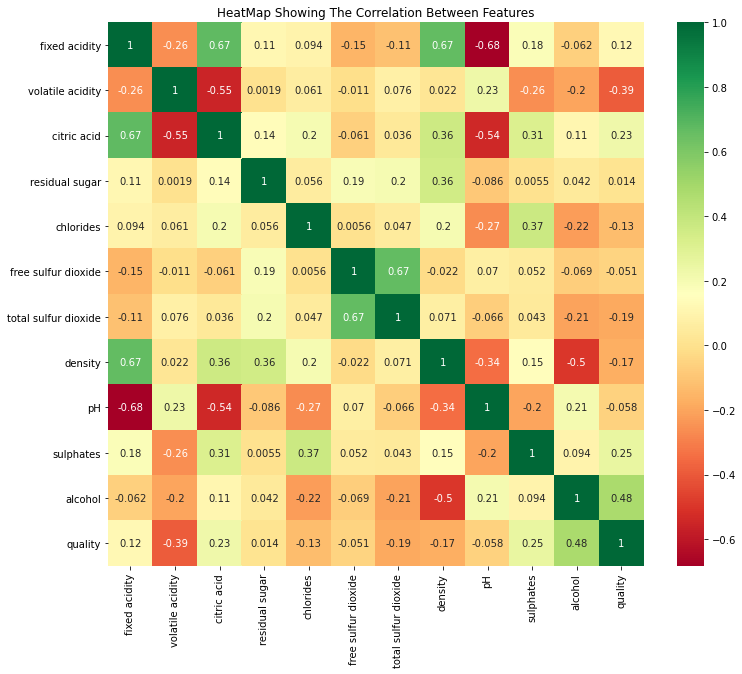

In [10]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn')
plt.title('HeatMap Showing The Correlation Between Features')

# Build Linear Regression Model 

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [19]:
X, y = data.drop(["quality"], axis = 1), data["quality"]
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
model = LinearRegression().fit(X_train, y_train)

In [22]:
y_pred= model.predict(X_test)

In [23]:
compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
compare.head(10)

,Actual,Predicted
1109,6,5.776983
1032,5,5.041862
1002,7,6.588130
487,6,5.384497
979,5,5.942356
1054,6,5.052629
542,5,5.414582
853,6,6.014388
1189,4,4.846123
412,5,4.963585


In [24]:
from sklearn import metrics

In [25]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.4871262164597176
MSE: 0.4007803663755688
RMSE: 0.6330721652193917


# Visualization

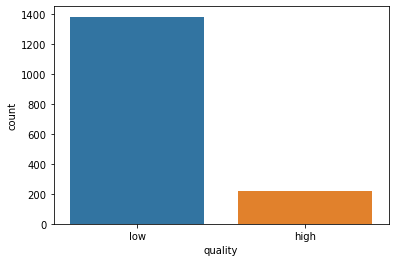

In [145]:
#Low Quality v High Quality
bins = (1, 6.5, 8.5)
quality_level = ['low', 'high']

quality_vis = pd.cut(data['quality'], bins = bins, labels = quality_level)
image = sns.countplot(quality_vis)

image.figure.savefig("Quality plot.png", dpi=500)

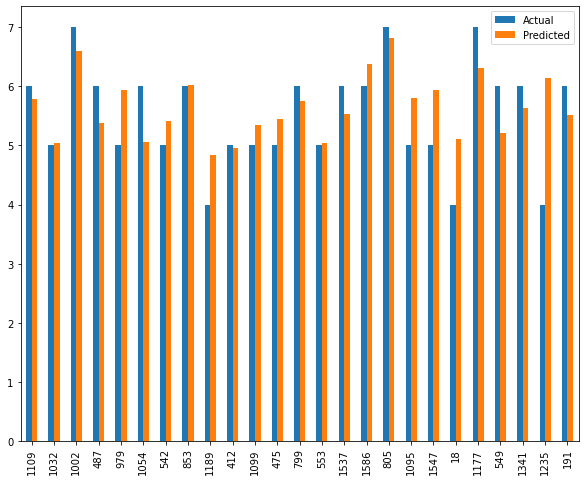

In [153]:
comparison = compare.head(25)
comparison.plot(kind='bar',figsize=(10,8))

# Filter High and Low Quality Red Wine

In [146]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [154]:
high_quality = data[data['quality'] >= 7].head(25)
low_quality = data[data['quality'] < 7].head(25)

# High Quality Wine HeatMap

Text(0.5, 1.0, 'HeatMap Showing The Correlation Between High Quality Red Wine Features')

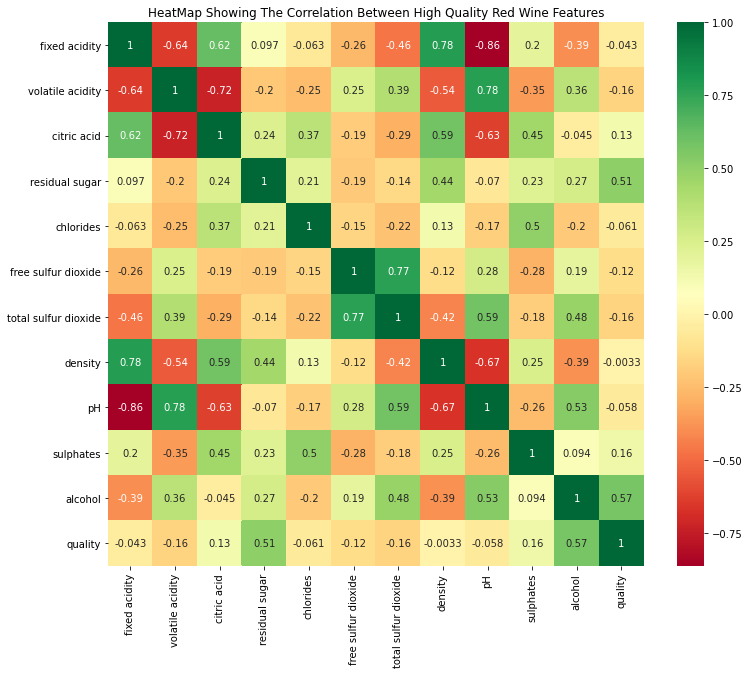

In [168]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
a=sns.heatmap(high_quality.corr(), annot=True,cmap ='RdYlGn')
plt.title('HeatMap Showing The Correlation Between High Quality Red Wine Features')

# Low Quality Wine HeatMap

Text(0.5, 1.0, 'HeatMap Showing The Correlation Between Low Quality Red Wine Features')

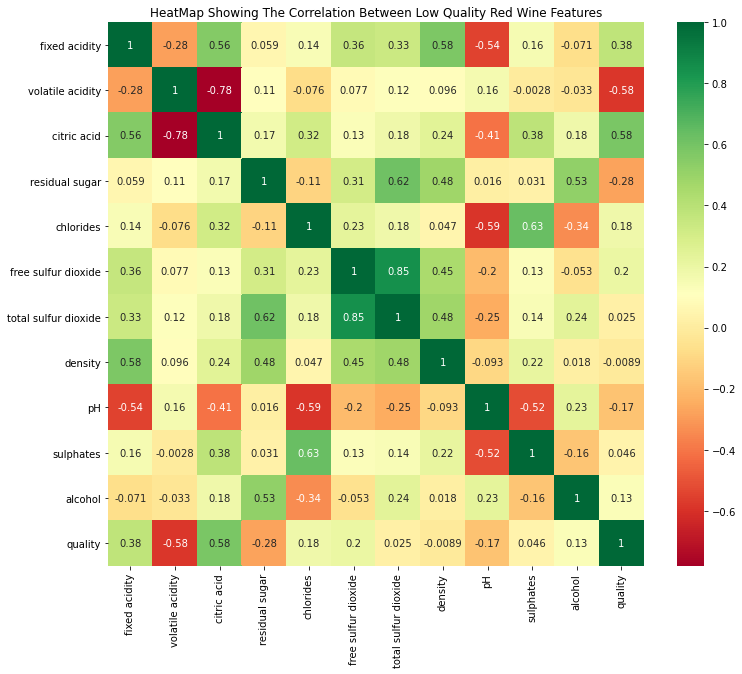

In [170]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
b=sns.heatmap(low_quality.corr(), annot=True,cmap ='RdYlGn')
plt.title('HeatMap Showing The Correlation Between Low Quality Red Wine Features')

[]

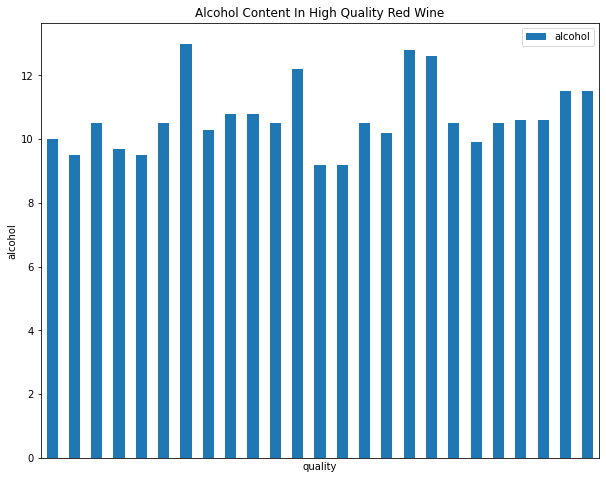

In [163]:
high_quality.plot(x ='quality', y = 'alcohol', kind = 'bar', figsize=(10,8))
plt.ylabel('alcohol')
plt.xlabel('quality')
plt.title('Alcohol Content In High Quality Red Wine')

ax = plt.gca()
ax.axes.xaxis.set_ticks([]) #hide x-label


